# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Clemente, Lance\
_Student No._: 2021-07811\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lance Veyonce C. Clemente**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import math
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


In [24]:
x = np.linspace(0,3,100)
#100 regularly spaced point from 0 to 3

In [25]:
np.append(x, np.linspace(0,3,100))
#turns into an array

array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
       0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
       0.3030303 , 0.33333333, 0.36363636, 0.39393939, 0.42424242,
       0.45454545, 0.48484848, 0.51515152, 0.54545455, 0.57575758,
       0.60606061, 0.63636364, 0.66666667, 0.6969697 , 0.72727273,
       0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
       0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303,
       1.06060606, 1.09090909, 1.12121212, 1.15151515, 1.18181818,
       1.21212121, 1.24242424, 1.27272727, 1.3030303 , 1.33333333,
       1.36363636, 1.39393939, 1.42424242, 1.45454545, 1.48484848,
       1.51515152, 1.54545455, 1.57575758, 1.60606061, 1.63636364,
       1.66666667, 1.6969697 , 1.72727273, 1.75757576, 1.78787879,
       1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394,
       1.96969697, 2.        , 2.03030303, 2.06060606, 2.09090909,
       2.12121212, 2.15151515, 2.18181818, 2.21212121, 2.24242

In [26]:
y = (np.sin(x)*x)+np.random.normal(0,0.1,100)
#Part 1's yi equation

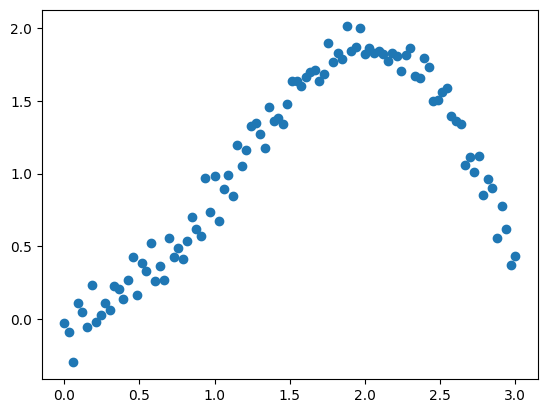

In [27]:
plt.scatter(x,y)
#Visualizing the noise.
#plt.plot(x,(np.sin(x)*x)+np.random.normal(0,0.1,100))
##PART 1, (np.sin(x)*x)+np.random.normal(0,0.1,100) is the main data set

In [28]:
x_training, x_crossvaltest, y_training, y_crossvaltest = train_test_split(x, y, test_size=0.50)
#splitting up the data set between training set, and crossvali&test sets.
x_test, x_crossval, y_test, y_crossval = train_test_split(x_crossvaltest, y_crossvaltest, test_size=0.50)
#splitting up further the crossvalidation and test data sets, giving the 2:1:1 ratio.

In [32]:
y_test

array([0.06239532, 0.84650936, 0.10780678, 0.70322659, 1.63749417,
       2.01279964, 0.98060902, 0.43451835, 1.82197594, 1.16033419,
       1.63496607, 0.22640444, 0.61935196, 1.76556095, 1.05592674,
       1.00851182, 1.50598686, 0.36193489, 0.20623978, 1.36390637,
       1.70285562, 1.84103013, 1.6869691 , 0.97178637, 0.02609828])

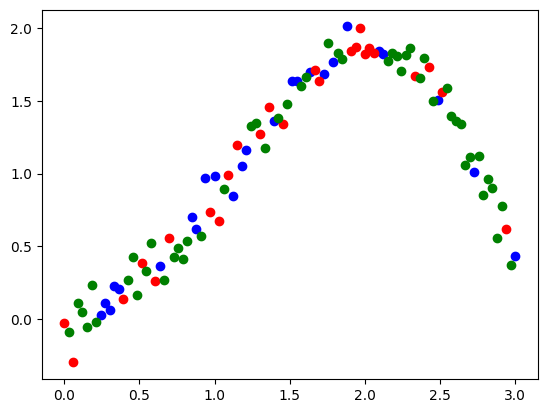

In [35]:
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_crossval, y_crossval, color = 'red')
plt.scatter(x_training, y_training, color = 'green')
#Visualizing the sectioning off  data sets

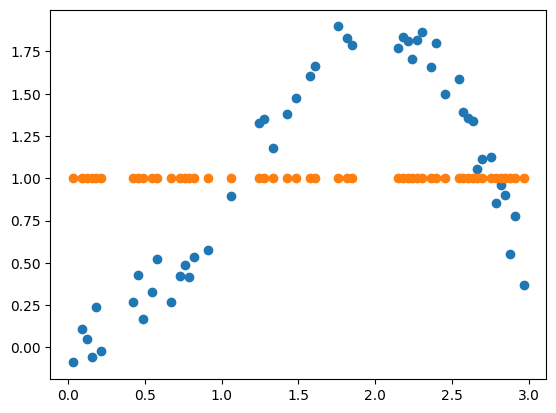

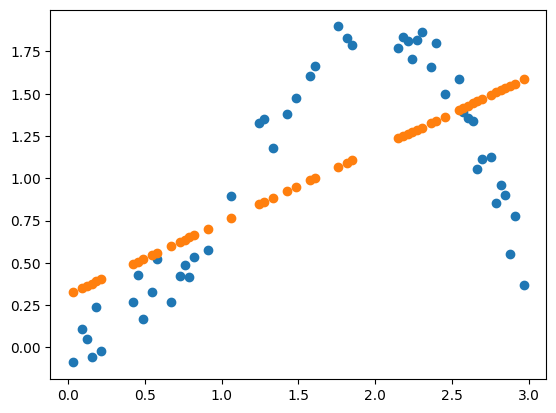

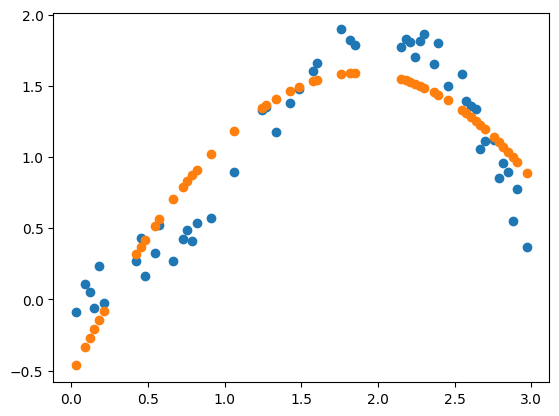

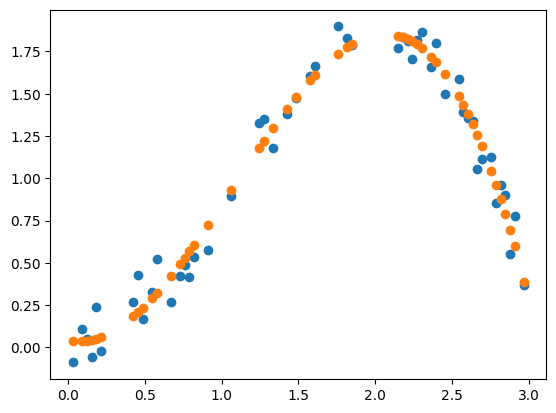

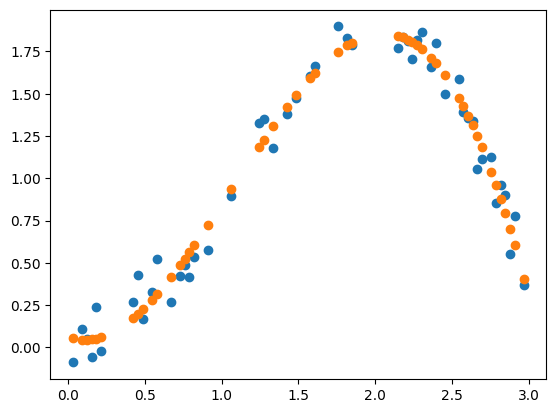

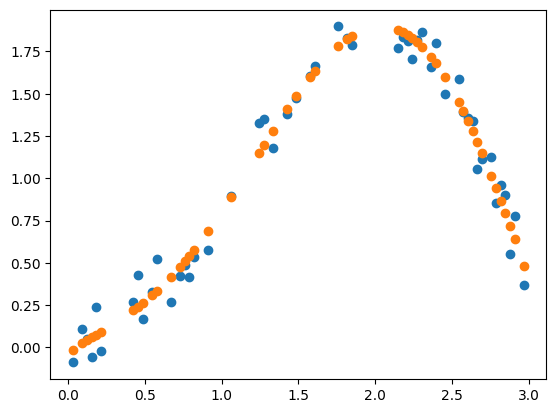

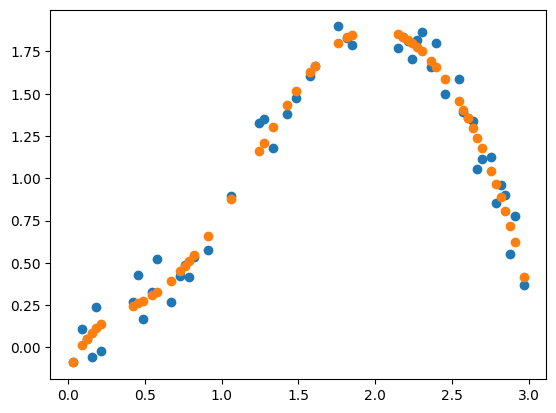

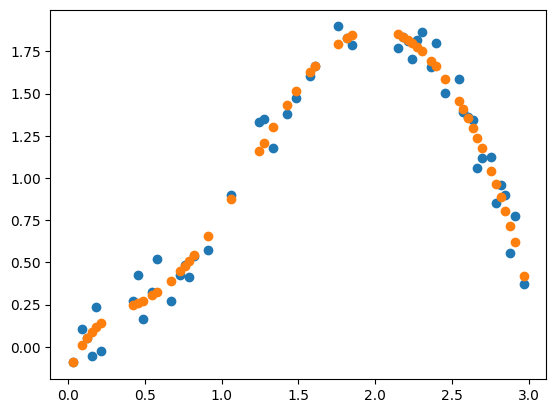

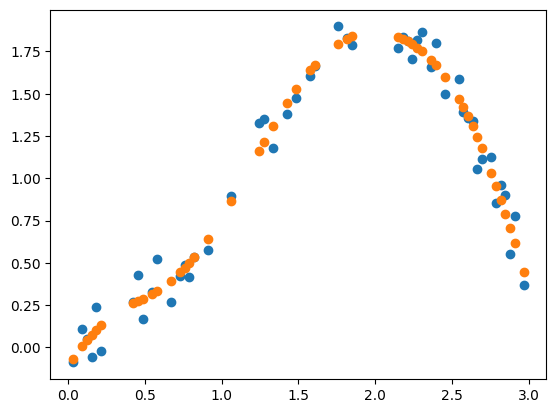

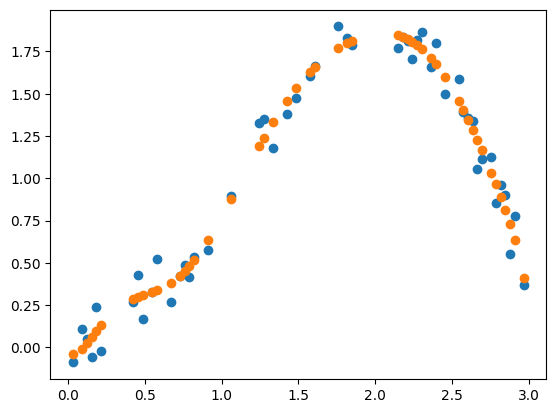

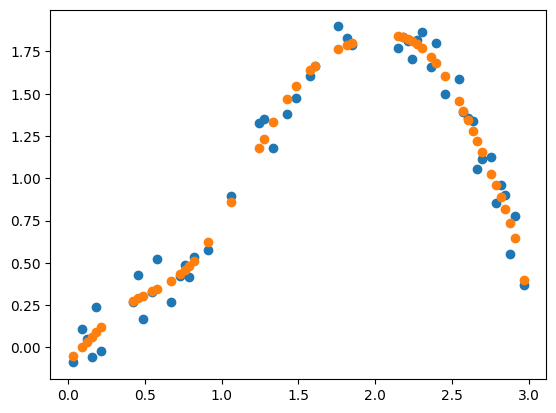

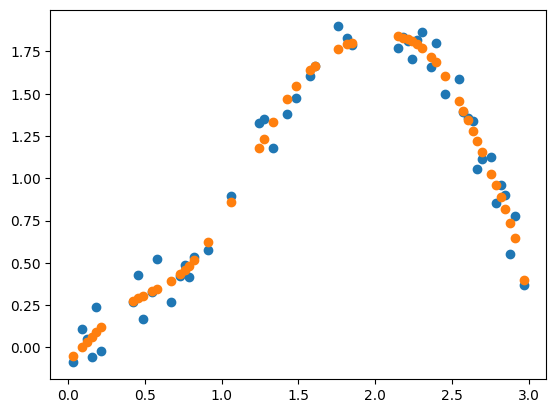

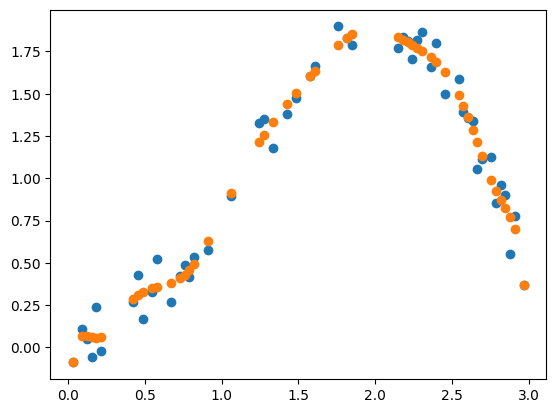

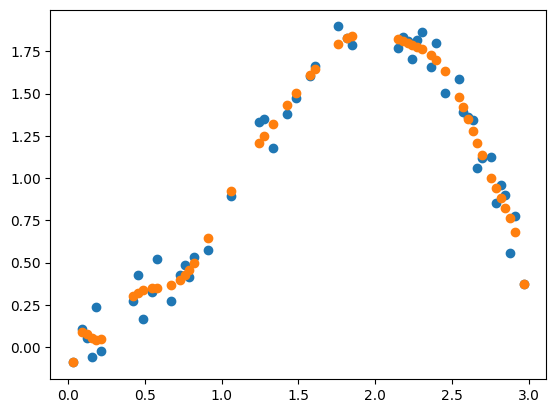

In [37]:
for deg in range(0,14):
  p = np.poly1d(np.polyfit(x_training, y_training, deg, rcond=None, full=False, w=None, cov=False))
  ypredict = p(x_training)
  plt.scatter(x_training,y_training)
  plt.scatter(x_training,ypredict)
  plt.show()

#best fit curve of the training set, per degree from 0 to 14

In [51]:
training = []
for deg in range(0,14):
  ptraining = np.poly1d(np.polyfit(x_training, y_training, deg, rcond=None, full=False, w=None, cov=False))
  y_predicttraining = ptraining(x_training)
  mse_training = np.square(np.subtract(y_training,y_predicttraining)).mean()
  rsme_training = math.sqrt(mse_training)
  print("Root Mean Square Error:\n")
  print(rsme_training)

  #WRONG process for rmse, use eq. 8.76, maybe it will fix graph of crossval.

  training.append(rsme_training)

Root Mean Square Error:

0.6315149774806654
Root Mean Square Error:

0.48069088939736987
Root Mean Square Error:

0.2633001156397429
Root Mean Square Error:

0.10467060790273802
Root Mean Square Error:

0.10435246068037374
Root Mean Square Error:

0.0999557440653471
Root Mean Square Error:

0.09637164951212188
Root Mean Square Error:

0.09635265663151177
Root Mean Square Error:

0.09572022921118647
Root Mean Square Error:

0.09402425407918939
Root Mean Square Error:

0.0936974055107751
Root Mean Square Error:

0.09369643252030521
Root Mean Square Error:

0.08901997813961002
Root Mean Square Error:

0.08849097878958664


In [60]:
crossval = []
for deg in range(0,14):
  pcrossval = np.poly1d(np.polyfit(x_crossval, y_crossval, deg, rcond=None, full=False, w=None, cov=False))
  y_predictcrossval = pcrossval(x_crossval)
  mse_crossval = np.square(np.subtract(y_crossval,y_predictcrossval)).mean()
  rsme_crossval = math.sqrt(mse_crossval)
  print("Root Mean Square Error:\n")
  print(rsme_crossval)

  crossval.append(rsme_crossval)
##how to get rms of cross vali data set? what here is the actual and predicted values?

Root Mean Square Error:

0.6814659147796777
Root Mean Square Error:

0.4200108640140043
Root Mean Square Error:

0.24476990709854038
Root Mean Square Error:

0.09635419003038968
Root Mean Square Error:

0.09604695175974517
Root Mean Square Error:

0.09497546244249241
Root Mean Square Error:

0.09472456172436582
Root Mean Square Error:

0.08864138204296775
Root Mean Square Error:

0.08452273624821947
Root Mean Square Error:

0.07958100822194854
Root Mean Square Error:

0.07940756458043446
Root Mean Square Error:

0.07266335267466763
Root Mean Square Error:

0.07062669912120056
Root Mean Square Error:

0.06950954582085432


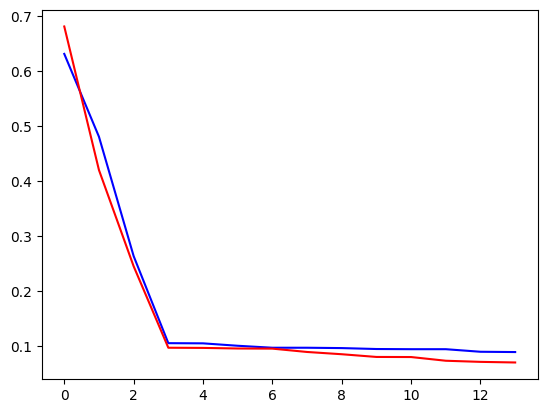

In [61]:
plt.plot(training, color = 'blue')
plt.plot(crossval, color = 'red')